# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Supervisionada
## Projeto 2: Construindo um Sistema de Intervenção para Estudantes

Bem-vindo ao segundo projeto do Nanodegree de Machine Learning! Neste Notebook, alguns templates de código já foram fornecidos, e será o seu trabalho implementar funcionalidades necessárias para completar este projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código que se segue precisará de funcionalidades adicionais que você deve fornecer. Instruções serão providenciadas para cada seção e as especificações para cada implementação estarão marcadas no bloco de código com o comando `'TODO'`. Tenha certeza de ler atentamente todas as instruções!

Além do código implementado, haverá questões relacionadas ao projeto e à implementação que você deve responder. Cada seção em que você tem que responder uma questão será antecedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e escreva respostas completas nas caixas de texto subsequentes que começam com **'Resposta: '**. O projeto enviado será avaliado baseado nas respostas para cada questão e a implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas, um clique duplo na célula entra no modo de edição.

### Questão 1 - Classificação versus Regressão
*Seu objetivo neste projeto é identificar estudantes que possam precisar de intervenção antecipada antes de serem reprovados. Que tipo de problema de aprendizagem supervisionada é esse: classificação ou regressão? Por quê?*

**Resposta: Se trata de um problema de classificacao, uma vez que precisamos determinar um rotulo para um determinado aluno baseado no modelo treinado. **

## Observando os Dados
Execute a célula de código abaixo para carregar as bibliotecas de Python necessárias e os dados sobre os estudantes. Note que a última coluna desse conjunto de dados, `'passed'`, será nosso rótulo alvo (se o aluno foi ou não aprovado). As outras colunas são atributos sobre cada aluno.

In [152]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Ler os dados dos estudantes
student_data = pd.read_csv("student-data.csv")
print "Os dados dos estudantes foram lidos com êxito!"

Os dados dos estudantes foram lidos com êxito!


### Implementação: Observando os Dados
Vamos começar observando o conjunto de dados para determinar quantos são os estudantes sobre os quais temos informações e entender a taxa de graduação entre esses estudantes. Na célula de código abaixo, você vai precisar calcular o seguinte:
- O número total de estudantes, `n_students`.
- O número total de atributos para cada estudante, `n_features`.
- O número de estudantes aprovados, `n_passed`.
- O número de estudantes reprovados, `n_failed`.
- A taxa de graduação da classe, `grad_rate`, em porcentagem (%).


In [153]:

n_students = len(student_data.count(axis=1))

n_features = len(student_data.drop('passed', axis=1).columns)

# TODO: Calcule o número de alunos aprovados
n_passed = len(student_data.passed[student_data.passed == 'yes'])

# TODO: Calcule o número de alunos reprovados
n_failed = len(student_data.passed[student_data.passed == 'no'])

# TODO: Calcule a taxa de graduação
grad_rate = float(n_passed) / n_students * 100

# Imprima os resultados
print "Número total de estudantes: {}".format(n_students)
print "Número de atributos: {}".format(n_features)
print "Número de estudantes aprovados: {}".format(n_passed)
print "Número de estudantes reprovados: {}".format(n_failed)
print "Taxa de graduação: {:.2f}%".format(grad_rate)

Número total de estudantes: 395
Número de atributos: 31
Número de estudantes aprovados: 265
Número de estudantes reprovados: 130
Taxa de graduação: 67.09%


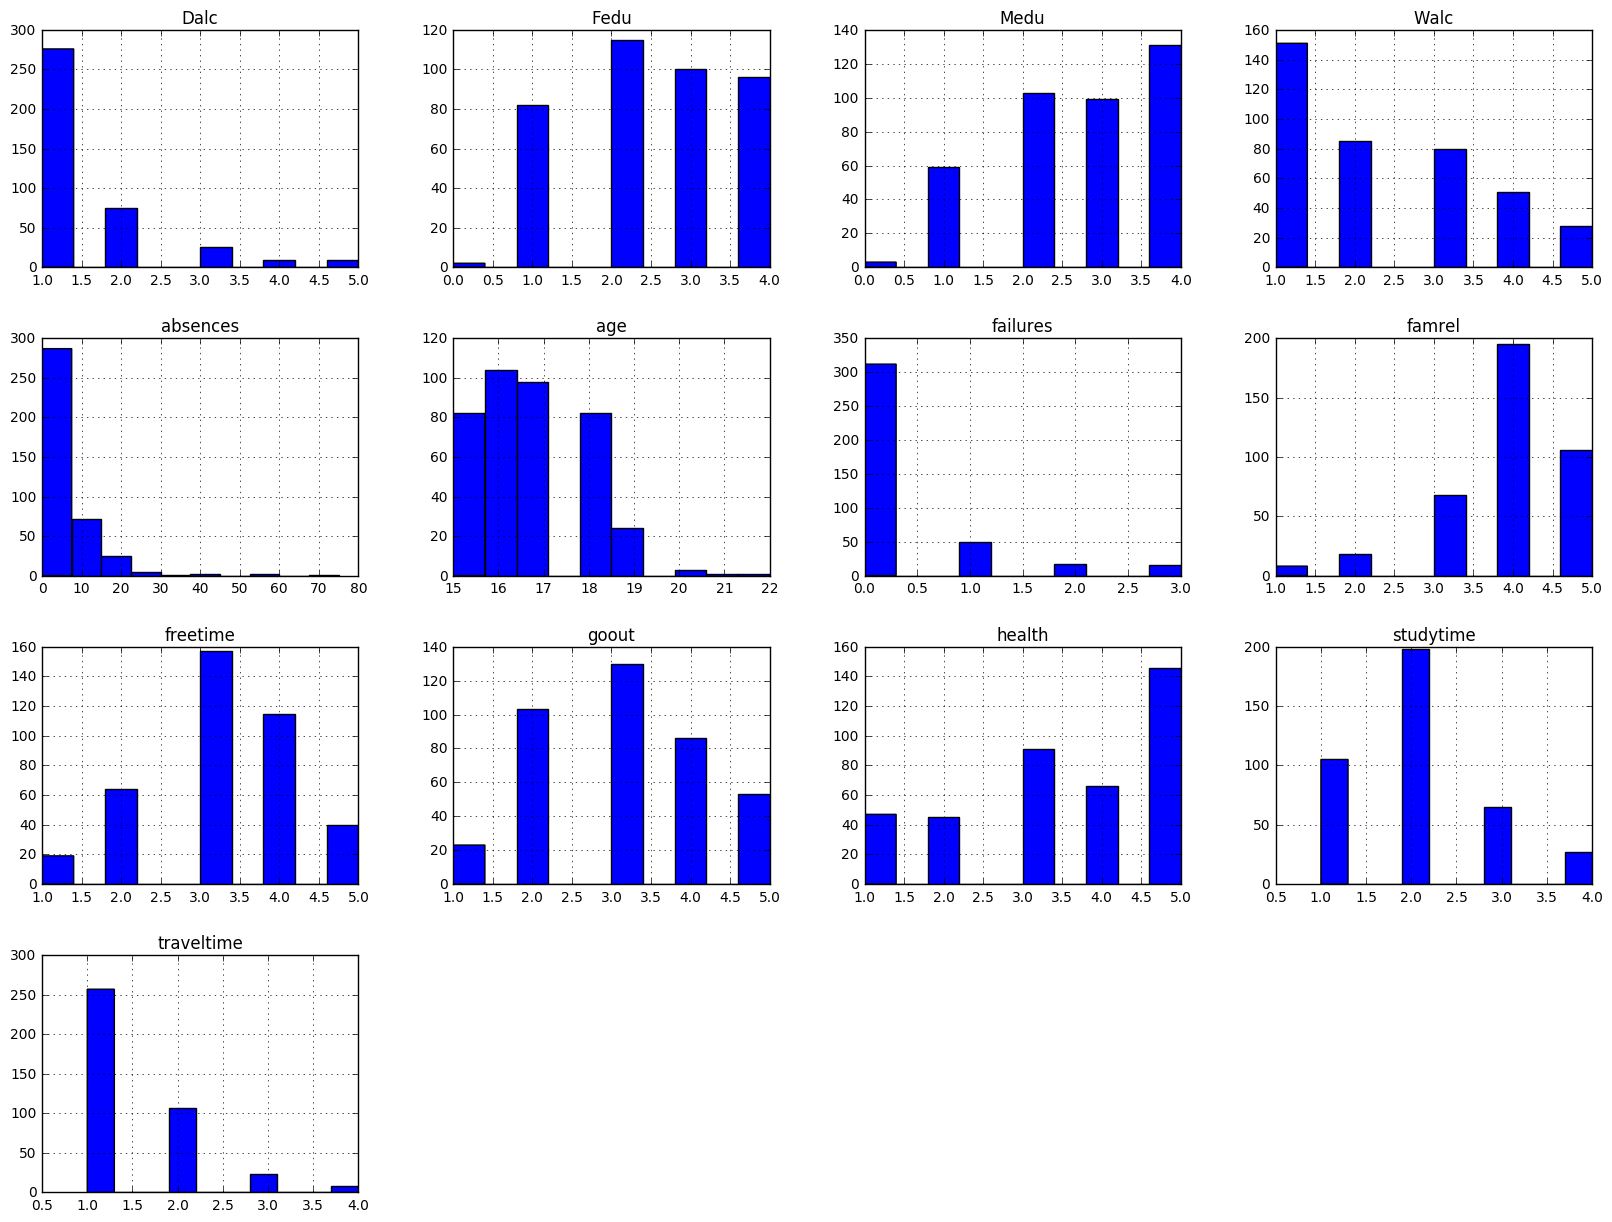

In [154]:
%matplotlib inline

import matplotlib.pyplot as plt
student_data.hist(figsize=(20,15))
plt.show()

## Preparando os Dados
Nesta seção, vamos preparara os dados para modelagem, treinamento e teste.

### Identificar atributos e variáveis-alvo
É comum que os dados que você obteve contenham atributos não numéricos. Isso pode ser um problema, dado que a maioria dos algoritmos de machine learning esperam dados númericos para operar cálculos.

Execute a célula de código abaixo para separar os dados dos estudantes em atributos e variáveis-alvo e verificar se algum desses atributos é não numérico.

In [155]:
# Extraia as colunas dos atributo
feature_cols = list(student_data.columns[:-1])

# Extraia a coluna-alvo 'passed'
target_col = student_data.columns[-1] 

# Mostre a lista de colunas
print "Colunas de atributos:\n{}".format(feature_cols)
print "\nColuna-alvo: {}".format(target_col)

# Separe os dados em atributos e variáveis-alvo (X_all e y_all, respectivamente)
X_all = student_data[feature_cols]
y_all = student_data[['passed']]

# Mostre os atributos imprimindo as cinco primeiras linhas
print "\nFeature values:"
print X_all.head()

Colunas de atributos:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Coluna-alvo: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...    

### Pré-processar Colunas de Atributo

Como você pode ver, há muitas colunas não numéricas que precisam ser convertidas! Muitas delas são simplesmente `yes`/`no`, por exemplo, a coluna `internet`. É razoável converter essas variáveis em valores (binários) `1`/`0`.

Outras colunas, como `Mjob` e `Fjob`, têm mais do que dois valores e são conhecidas como variáveis categóricas. A maneira recomendada de lidar com esse tipo de coluna é criar uma quantidade de colunas proporcional aos possíveis valores (por exemplo, `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc), e assinalar `1` para um deles e `0` para todos os outros.

Essas colunas geradas são por vezes chamadas de _variáveis postiças_ (_dummy variables_), e nós iremos utilizar a função [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para fazer essa conversão. Execute a célula de código abaixo para executar a rotina de pré-processamento discutida nesta seção.

In [156]:
def preprocess_features(X):
    ''' Pré-processa os dados dos estudantes e converte as variáveis binárias não numéricas em
        variáveis binárias (0/1). Converte variáveis categóricas em variáveis postiças. '''
    
    # Inicialize nova saída DataFrame
    output = pd.DataFrame(index = X.index)

    # Observe os dados em cada coluna de atributos 
    for col, col_data in X.iteritems():
        
        # Se o tipo de dado for não numérico, substitua todos os valores yes/no por 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # Se o tipo de dado for categórico, converta-o para uma variável dummy
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Reúna as colunas revisadas
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementação: Divisão dos Dados de Treinamento e Teste
Até agora, nós convertemos todos os atributos _categóricos_ em valores numéricos. Para o próximo passo, vamos dividir os dados (tanto atributos como os rótulos correspondentes) em conjuntos de treinamento e teste. Na célula de código abaixo, você irá precisar implementar o seguinte:
- Embaralhe aleatoriamente os dados (`X_all`, `y_all`) em subconjuntos de treinamento e teste.
  - Utilizar 300 pontos de treinamento (aproxidamente 75%) e 95 pontos de teste (aproximadamente 25%).
  - Estabelecer um `random_state` para as funções que você utiliza, se a opção existir.
  - Armazene os resultados em `X_train`, `X_test`, `y_train` e `y_test`.

In [157]:
# TODO: Importe qualquer funcionalidade adicional de que você possa precisar aqui
from sklearn.cross_validation import train_test_split

# TODO: Estabeleça o número de pontos de treinamento
num_train = 300

# Estabeleça o número de pontos de teste
num_test = X_all.shape[0] - num_train

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size = num_train, test_size = num_test)

# Mostre o resultado da distribuição
print "O conjunto de treinamento tem {} amostras.".format(X_train.shape[0])
print "O conjunto de teste tem {} amostras.".format(X_test.shape[0])

O conjunto de treinamento tem 300 amostras.
O conjunto de teste tem 95 amostras.


## Treinando e Avaliando Modelos
Nesta seção, você irá escolher 3 modelos de aprendizagem supervisionada que sejam apropriados para esse problema e que estejam disponíveis no `scikit-learn`. Primeiro você irá discutir o raciocínio por trás da escolha desses três modelos considerando suas vantagens e desvantagens e o que você sabe sobre os dados. Depois você irá ajustar o modelo a diferentes tamanhos de conjuntos de treinamento (com 100, 200 e 300 pontos) e medir a pontuação F<sub>1</sub>. Você vai precisar preencher três tabelas (uma para cada modelo) que mostrem o tamanho do conjunto de treinamento, o tempo de treinamento, o tempo de previsão e a pontuação F<sub>1</sub> no conjunto de treinamento.

**Os seguintes modelos de aprendizagem supervisionada estão atualmente disponíveis no **[`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)** para você escolher:**
- Gaussian Naive Bayes (GaussianNB)
- Árvores de Decisão
- Métodos de agregação (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Método do gradiente estocástico (SGDC)
- Máquinas de vetores de suporte (SVM)
- Regressão logística

### Questão 2 - Aplicação dos Modelos
*Liste três modelos de aprendizagem supervisionada que são apropriadas para esse problema. Para cada modelo escolhido:*
- Descreva uma aplicação em mundo real na indústria em que o modelo pode ser aplicado. *(Talvez você precise fazer um pouco de pesquisa para responder essa questão – dê as devidas referências!)* 
- Quais são as vantagens do modelo; quando ele tem desempenho melhor? 
- Quais são as desvantagens do modelo, quando ele tem desempenho pior?
- O que faz desse modelo um bom candidato para o problema, considerando o que você sabe sobre os dados?

**Resposta: **
A - Árvores de Decisão

Se trata de um algoritmo deterministico simples que generaliza regras para determinacao dos limites entre os conjuntos de dados. Ao contrario do KNN, ele exige mais processamento que memo'ria do sistema, uma vez que precisa gerar um modelo a partir dos dados. Porem, nao precisa manter as instancias em memoria para predizer os resultados.

Um uso pratico das arvores de decisao pode ser encontrado na resolucao de problemas de decisao numa empresa [3]. Uma vez que as arvores de decisao podem ser exportadas para uma representacao grafica, e' possivel utilizar essa representacao para identificar problemas ou sugerir solucoes para os clientes.

Segundo comparativo de Jadhav e Channe [1] , o algoritmo trabalha ra'pido para conjuntos maiores de dados, mas tem performance menos proveitosa que o KNN para conjuntos de dados pequenos. Ele tambe'm e' menos sucetivel quanto a dados ruidosos que o KNN.

Uma desvantagem da arvore de decisao e' que a arvore pode ficar muito complexa e perder em generalidade dos dados.

O motivador para avaliar a utilizacao das arvores de decisao neste projeto e' que se trata de um algoritmo muito simples e que pode apresentar bons resultados sem a utilizacao de um modelo tao complexo quanto o SVM por exemplo.

B - K-Nearest Neighbors (KNeighbors) pode ser considerado um dos modelos mais simples que identifica grupos de dados com caracteristicas semelhantes. Ele e' um algoritmo mais exigente em termos de memoria que as arvores de decisao, uma vez que precisa manter as instancias em memoria para realizar predicoes.

O KNN e' usado principalmente para criar sistemas de recomendacao e identificao de similaridade entre individuos [4]

Vantagem: ele e' um algoritmo de aprendizado baseado em instancias e consome menos tempo de treinamento, ao contra'rio do SVM e das arvores de decisao que precisam abstrair um modelo a partir dos dados.
Ale'm disso, o KNN consegue trabalhar com dados lineares ou nao-lineares e pode criar N agrupamentos de dados diferentes [2].

Desvantagem: se por um lado o KNN demanda pouco tempo para treinamento, seu uso para predicao de um resultado pode demorar mais que um algoritmo baseado em modelo. Outra desvantagem e' o espaco em memoria necessario para manter as instancias.
Temos ainda que o algoritmo nao e' deterministico, uma vez que os centroides inicias sao aleatorios, existe a possibilidade de que a acuracia nao seja satisfatoria na primeira execucao. Por isso e' interessante rodar o KNN mais de uma vez para amenizar a possibilidade de que os centroides iniciais causem problemas.

Ainda no contexto do KNN, segundo comparativo de Jadhav e Channe [1] , o algoritmo trabalha ra'pido para conjuntos menores de dados, mas tem sua performance afetada em conjuntos de dados muito grandes. Ale'm de perder acura'cia quando exposto a dados ruidosos.

O motivador para avaliar a utilizacao das arvores de decisao neste projeto e' que ele trabalha bem tanto com dados lineares quanto nao-lineares. Ale'm disso, nosso conjunto de dados nao e' tao grande a ponto de impactar na performance deste algoritmo. Contudo, ele pode ser afetado por eventuais outliers e ruidos existentes nos dados.

C - Máquinas de vetores de suporte (SVM).

As SVMs sao um modelo mais complexo de aprendizado quando comparados com as arvores de decisao e o KNN. Elas tentam separar os dados linearmente utilizando os dados mais relevantes para criar um hyperplano que divida o conjunto de dados. 

Uma aplicacao real das SVM e' a deteccao de faces.[5]

Vantangem: ele e' menos sucetivel a dados ruidosos e a outliers que o KNN e arvores decisao, uma vez que utiliza apenas os dados mais relevantes para delimitar o hyperplano [2].

Desvantagem: ele precisa que os dados sejam linearmente separados (hyperplace), caso contrario o algoritmo pode rodar indefinidamente.
Outra desvantagem e' que o SVM pode separar apenas dois conjuntos de dados.

O motivador para avaliar a utilizacao do SVM neste projeto e' que, se existir um hyperplano dividindo os dados, o SVM pode apresentar uma acuracia mais satisfato'ria que o KNN e as arvores de decisao.


**Referencias:**

[1] - `Comparative Study of KNN, Naive Bayes and Decision Tree Classification Techniques`, URL: https://pdfs.semanticscholar.org/51c0/68c263ee197a292df5b74b58c8c55df9f9ca.pdf

[2] - URL: https://www.quora.com/What-is-better-k-nearest-neighbors-algorithm-k-NN-or-Support-Vector-Machine-SVM-classifier-Which-algorithm-is-mostly-used-practically-Which-algorithm-guarantees-reliable-detection-in-unpredictable-situations

[3] - URL: https://www.quora.com/What-are-some-practical-business-uses-of-decision-trees

[4] - URL: https://www.quora.com/What-are-industry-applications-of-the-K-nearest-neighbor-algorithm

[5] - URL: https://data-flair.training/blogs/applications-of-svm/

### Configuração
Execute a célula de código abaixo para inicializar três funções de ajuda que você pode utilizar para treinar e testar os três modelos de aprendizagem supervisionada que você escolheu acima. As funções são as seguintes:
- `train_classifier` - recebe como parâmetro um classificador e dados de treinamento e ajusta o classificador aos dados.
- `predict_labels` - recebe como parâmetro um classificador ajustado, atributos e rótulo alvo e faz estimativas utilizando a pontuação do F<sub>1</sub>.
- `train_predict` - recebe como entrada um classificador, e dados de treinamento e teste, e executa `train_clasifier` e `predict_labels`.
 - Essa função vai dar a pontuação F<sub>1</sub> tanto para os dados de treinamento como para os de teste, separadamente.

In [158]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print "O modelo foi treinado em {:.4f} segundos".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print "As previsões foram feitas em {:.4f} segundos.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print "Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train))
    
    # Treina o classificador
    train_classifier(clf, X_train, y_train)
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print "Pontuação F1 para o conjunto de treino: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "Pontuação F1 para o conjunto de teste: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementação: Métricas de Desempenho do Modelo
Com as funções acima, você vai importar os três modelos de aprendizagem supervisionada de sua escolha e executar a função `train_prediction` para cada um deles. Lembre-se de que você vai precisar treinar e usar cada classificador para três diferentes tamanhos de conjuntos de treinamentos: 100, 200 e 300 pontos. Então você deve ter 9 saídas diferentes abaixo – 3 para cada modelo utilizando cada tamanho de conjunto de treinamento. Na célula de código a seguir, você deve implementar o seguinte:
- Importe os três modelos de aprendizagem supervisionada que você escolheu na seção anterior.
- Inicialize os três modelos e armazene eles em `clf_A`, `clf_B` e `clf_C`.
 - Defina um `random_state` para cada modelo, se a opção existir.
 - **Nota:** Utilize as configurações padrão para cada modelo – você vai calibrar um modelo específico em uma seção posterior.
- Crie diferentes tamanhos de conjuntos de treinamento para treinar cada modelo.
 - *Não embaralhe e distribua novamente os dados! Os novos pontos de treinamento devem ser tirados de `X_train` e `y_train`.*
- Treine cada modelo com cada tamanho de conjunto de treinamento e faça estimativas com o conjunto de teste (9 vezes no total).  
**Nota:** Três tabelas são fornecidas depois da célula de código a seguir, nas quais você deve anotar seus resultados.

In [159]:
# TODO: Importe os três modelos de aprendizagem supervisionada do sklearn
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

clf_A = tree.DecisionTreeClassifier()
clf_B = KNeighborsClassifier()
clf_C = clf = svm.SVC()

clfs = [clf_A, clf_B, clf_C]
train_sizes = [100, 200, 300]

X_train = None
X_test = None
y_train = None
y_test = None

for train_size in train_sizes:
    test_size = X_all.shape[0] - train_size
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size = train_size, test_size = test_size)
    
    for clf in clfs:
        train_predict(clf, X_train, y_train, X_test, y_test)

Treinando um DecisionTreeClassifier com 100 pontos de treinamento. . .
O modelo foi treinado em 0.0010 segundos
As previsões foram feitas em 0.0002 segundos.
Pontuação F1 para o conjunto de treino: 1.0000.
As previsões foram feitas em 0.0003 segundos.
Pontuação F1 para o conjunto de teste: 0.7103.
Treinando um KNeighborsClassifier com 100 pontos de treinamento. . .
O modelo foi treinado em 0.0015 segundos
As previsões foram feitas em 0.0013 segundos.
Pontuação F1 para o conjunto de treino: 0.8322.
As previsões foram feitas em 0.0030 segundos.
Pontuação F1 para o conjunto de teste: 0.7571.
Treinando um SVC com 100 pontos de treinamento. . .
O modelo foi treinado em 0.0016 segundos
As previsões foram feitas em 0.0009 segundos.
Pontuação F1 para o conjunto de treino: 0.8535.
As previsões foram feitas em 0.0024 segundos.
Pontuação F1 para o conjunto de teste: 0.8042.
Treinando um DecisionTreeClassifier com 200 pontos de treinamento. . .
O modelo foi treinado em 0.0015 segundos
As previsões

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=

### Resultados em tabelas
Edite a célula abaixo e veja como a tabela pode ser desenhada em [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). Você deve salvar seus resultados abaixo nas tabelas fornecidas.

** Classificador 1 - Decision Tree**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100 | 0.0010 segundos | 0.0002 segundos | 1.0000 | 0.7103 |
| 200 | 0.0015 segundos | 0.0014 segundos | 1.0000 | 0.7097 |
| 300 | 0.0018 segundos | 0.0002 segundos | 1.0000 | 0.6833 |

** Classificador 2 - KNN**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100 | 0.0015 segundos | 0.0013 segundos | 0.8322 | 0.7571 |
| 200 | 0.0009 segundos | 0.0041 segundos | 0.8590 | 0.7789 |
| 300 | 0.0011 segundos | 0.0058 segundos | 0.8625 | 0.7519 |

** Classificador 3 - SVM**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100 | 0.0016 segundos | 0.0009 segundos | 0.8535 | 0.8042 |
| 200 | 0.0048 segundos | 0.0032 segundos | 0.8660 | 0.7987 |
| 300 | 0.0073 segundos | 0.0051 segundos | 0.8820 | 0.7448 |

## Escolhendo o Melhor Modelo
Nesta seção final, você irá escolher dos três modelos de aprendizagem supervisionada o *melhor* para utilizar os dados dos estudantes. Você então executará um busca em matriz otimizada para o modelo em todo o conjunto de treinamento (`X_train` e `y_train`) ao calibrar pelo menos um parâmetro, melhorando em comparação a pontuação F<sub>1</sub> do modelo não calibrado. 

### Questão 3 - Escolhendo o Melhor Modelo
*Baseando-se nos experimentos que você executou até agora, explique em um ou dois parágrafos ao conselho de supervisores qual modelo que você escolheu como o melhor. Qual modelo é o mais apropriado baseado nos dados disponíveis, recursos limitados, custo e desempenho?*

**Resposta: **
Baseado nos experimentos, o SVM e' uma boa escolha de algoritmo a ser adotado para predizer a intervencao dos alunos. A pontuacao de testes e' maior que do KNN e das arvores de decisao. Alem disso, como nosso conjunto de dados nao e' muito extenso, o tempo gasto para treinamento do modelo nao se mostra um fator impeditivo.
Temos ainda que as arvores de decisao parecem estar sofrendo de overfiting porque a pontuacao de treinamento consegue uma pontuacao de 1, mas a pontuacao de teste e' a menor entre todos os tres algoritmos.

### Questão 4 – O Modelo para um Leigo
*Em um ou dois parágrafos, explique para o conselho de supervisores, utilizando termos leigos, como o modelo final escolhido deve trabalhar. Tenha certeza que você esteja descrevendo as melhores qualidades do modelo, por exemplo, como o modelo é treinado e como ele faz uma estimativa. Evite jargões técnicos ou matemáticos, como descrever equações ou discutir a implementação do algoritmo.*

**Resposta: **
O modelo SVM e' um algoritmo que tenta maximizar a distancia entre dois grupos baseado nas caracteristicas dos alunos. O SVM utiliza as caracteristicas mais relevantes para tracar uma linha que separa os dois grupos de alunos. Quando apresentamos um novo aluno pare esse modelo, ele entao utiliza as carasteristicas mais relevantes desse novo aluno e comparada com essa linha divisoria para determinar em qual dos lados da linha ele se adequa melhor. Utilizando apenas as caracteristicas mais relevantes ele fica menos suscetivel a variacoes muito grandes entre as caracteristicas dos alunos.

### Implementação: Calibrando o Modelo (_Tuning_)
Calibre o modelo escolhido. Utilize busca em matriz (`GridSearchCV`) com, pelo menos, um parâmetro importante calibrado com, pelo menos, 3 valores diferentes. Você vai precisar utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você deve implementar o seguinte:
- Importe [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Crie o dicionário de parâmetros que você deseja calibrar para o modelo escolhido.
 - Examplo: `parameters = {'parameter' : [list of values]}`.
- Inicialize o classificador que você escolheu e armazene-o em `clf`.
- Crie a função de pontuação F<sub>1</sub> utilizando `make_scorer` e armazene-o em `f1_scorer`.
 - Estabeleça o parâmetro `pos_label` para o valor correto!
- Execute uma busca em matriz no classificador `clf` utilizando o `f1_scorer` como método de pontuação e armazene-o em `grid_obj`.
- Treine o objeto de busca em matriz com os dados de treinamento (`X_train`, `y_train`) e armazene-o em `grid_obj`.

In [181]:
# TODO: Importe 'GridSearchCV' e 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, make_scorer


# TODO: Crie a lista de parâmetros que você gostaria de calibrar
param_grid = {'kernel':('linear','poly', 'sigmoid'), 'C':[1, 2, 3, 6, 12]}

# TODO: Faça uma função de pontuação f1 utilizando 'make_scorer'
f1_scorer = make_scorer(f1_score, pos_label='yes')

grid_obj = GridSearchCV(svm.SVC(), param_grid, scoring=f1_scorer)

# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e encontre os parâmetros ótimos
# Obtive erros chamando o fit sem fazer o reshape do array de treinamento, tive que adotar 
# um workaroud para que tudo funcionasse
grid_obj.fit(X_train, np.reshape(y_train.values,[len(y_train)]))

# Get the estimator
estimator = grid_obj.best_estimator_

# Reporte a pontuação final F1 para treinamento e teste depois de calibrar os parâmetrosprint "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "O modelo calibrado tem F1 de {:.4f} no conjunto de treinamento.".format(predict_labels(estimator, X_train, y_train))
print "O modelo calibrado tem F1 de {:.4f} no conjunto de teste.".format(predict_labels(estimator, X_test, y_test))


As previsões foram feitas em 0.0028 segundos.
O modelo calibrado tem F1 de 0.8000 no conjunto de treinamento.
As previsões foram feitas em 0.0010 segundos.
O modelo calibrado tem F1 de 0.8125 no conjunto de teste.


In [183]:
print(estimator)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### Questão 5 - Pontuação F<sub>1</sub> Final
*Qual é a pontuação F<sub>1</sub> do modelo final para treinamento e teste? Como ele se compara ao modelo que não foi calibrado?*

**Resposta: **
Classificador SVM

| Modelo |Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: |
| Nao calibrado | 0.8820 | 0.7448 |
| Calibrado | 0.8000 | 0.8125 |

Apesar de o modelo calibrado apresentar uma pontuacao menor do que no modelo nao-calibrado, a pontuacao de teste aumentou muito. Isso sugere que o overfitting foi reduzido, aumentando a capacidade de generalizacao do modelo.

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando o iPython Nothebook como um document HTML. Você pode fazer isso utilizando o menu acima e navegando para  
**File -> Download as -> HTML (.html)**. Inclua a documentação final junto com o notebook para o envio do seu projeto.